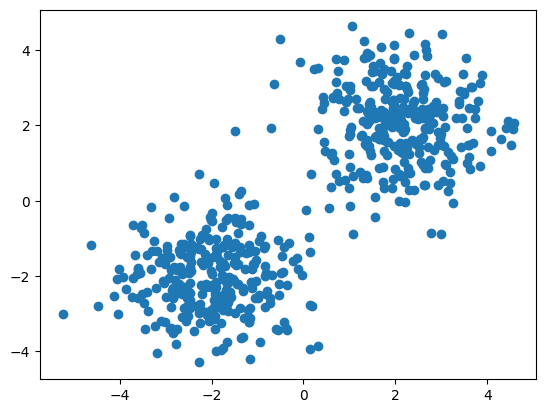

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

blobs = make_blobs([300, 300], 2, centers=[(-2, -2), (2, 2)], random_state=42)[0]
plt.scatter(blobs[:, 0], blobs[:, 1])

<Axes: xlabel='x', ylabel='y'>

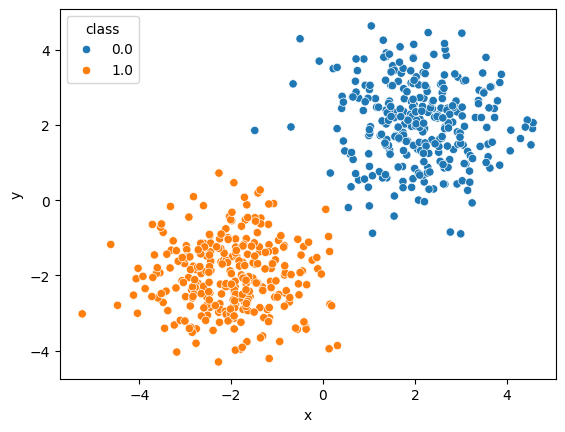

In [2]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC

kmeans = KMeans(2)
kmeans.fit(blobs)

blobs = np.c_[blobs, kmeans.predict(blobs)]

df = pd.DataFrame(blobs, columns=["x", "y", "class"])
sns.scatterplot(x="x", y="y", hue="class", data=df)

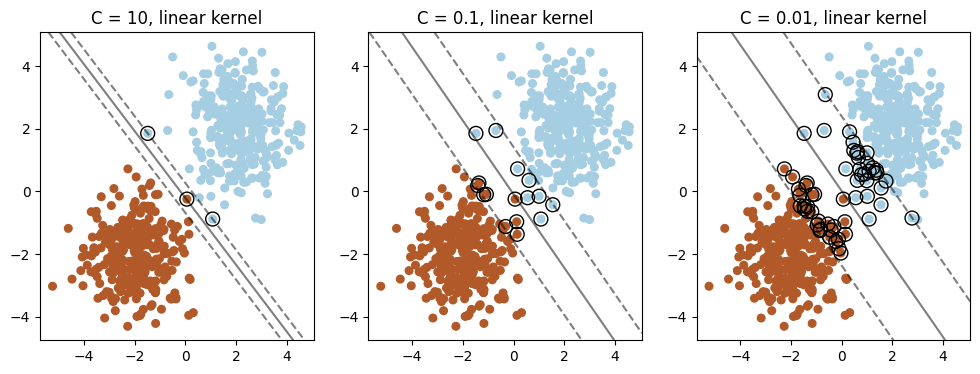

In [4]:
from utils import plot_svm_margins

X, y = df.drop('class', axis=1).to_numpy(), df['class'].to_numpy()
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

for i, C in enumerate([10, 0.1, 0.01], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="linear", C=C), X, y)
    plt.title(f"C = {C}, linear kernel")

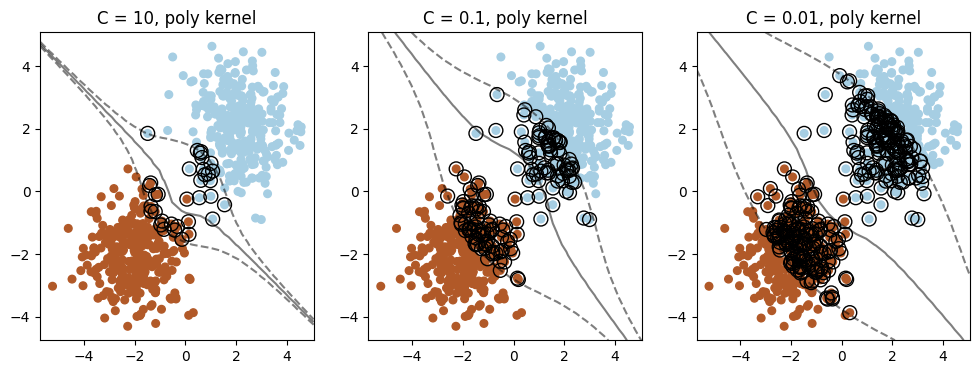

In [7]:
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

for i, C in enumerate([10, 0.1, 0.01], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="poly", C=C), X, y)
    plt.title(f"C = {C}, poly kernel")

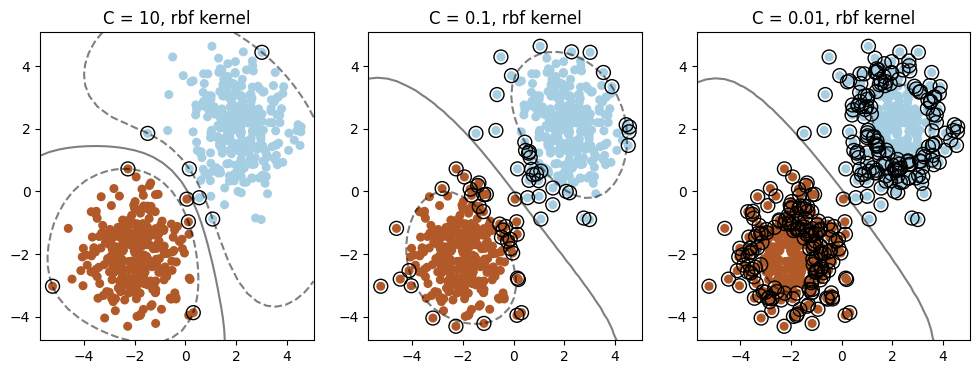

In [8]:
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

for i, C in enumerate([10, 0.1, 0.01], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="rbf", C=C), X, y)
    plt.title(f"C = {C}, rbf kernel")

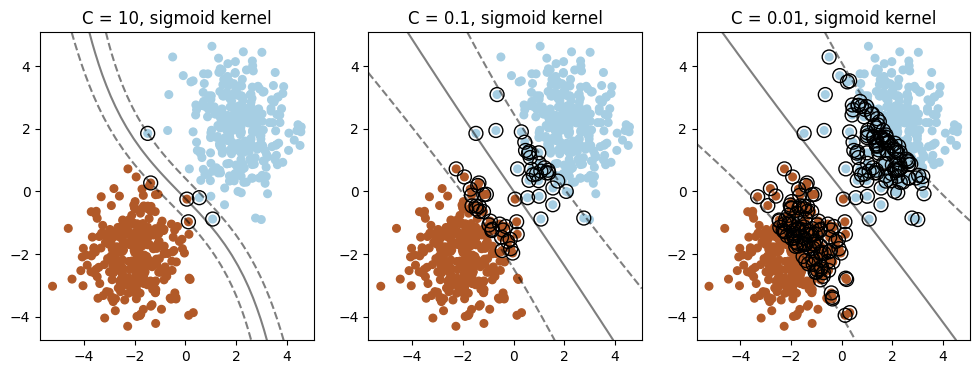

In [9]:
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

for i, C in enumerate([10, 0.1, 0.01], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="sigmoid", C=C), X, y)
    plt.title(f"C = {C}, sigmoid kernel")